In [44]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.improve_dataset import  *
from utils.linkage import *
from model.improvehc import improvehc

from utils.poincare import *

In [3]:
method = 'average'
cell_path1 = './datas/test/A35.h5'
folder_path1 = "./datas/test/1/"
radius1 = 147.63807097087118 *1.5
c1= 0.001
epoches1 = 15
cell_path2 = './datas/test/A36.h5'
folder_path2 = "./datas/test/2/"
radius2 = 149.58609561052123 * 1.5
c2= 0.001
epoches2 =15

In [5]:
loss1 = merge_by_radius(cell_path1,folder_path1,radius1,method)
print("cell meta score for dataset1: {}\n".format(loss1))

adata1 = pd.read_csv(folder_path1+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata1 = adata1.set_index(adata1.columns[0])
adata1 = anndata.AnnData(adata1)
adata1.obs['celltype'] = cell_meta.values.reshape(-1)

100%|███████████████████████████████████████| 4128/4128 [07:27<00:00,  9.23it/s]


cell meta score for dataset1: 0.7570251937984496



/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_82811/1559775912.py:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = anndata.AnnData(adata1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
loss2 = merge_by_radius(cell_path2,folder_path2,radius2,method)
print("cell meta score for dataset2: {}".format(loss2))

adata2 = pd.read_csv(folder_path2+"merge_cell_data.csv")
cell_meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata2 = adata2.set_index(adata2.columns[0])
adata2 = anndata.AnnData(adata2)
adata2.obs['celltype'] = cell_meta.values.reshape(-1)

100%|███████████████████████████████████████| 5565/5565 [08:42<00:00, 10.65it/s]


cell meta score for dataset2: 0.6806828391734052


/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_82811/2588938310.py:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata2 = anndata.AnnData(adata2)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
preprocessing_cluster(adata1,N_pcs=50,resolution=1)
preprocessing_cluster(adata2,N_pcs=50,resolution=1)

inter_gene = sort_data(adata1,adata2)

tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path1)
tmp2 = calculate_cluster_centroid_for_genes(adata2,inter_gene,folder_path2)

ari = adjusted_rand_score(adata1.obs['celltype'].tolist(), adata1.obs['leiden'].tolist())
print("ARI score for adata1: ", ari)

ari = adjusted_rand_score(adata2.obs['celltype'].tolist(), adata2.obs['leiden'].tolist())
print("ARI score for adata2: ", ari)
meta_list1 = []
clustername = adata1.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata1.obs['leiden']) if x == str(value)]
    t = [adata1.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list1.append(most_common_element)
np.save(folder_path1+'tree_merge.npy',meta_list1)

    
meta_list2 = []
clustername = adata2.obs['leiden'].unique().tolist()
clustername = list(map(int, clustername))
clustername.sort()
for value in clustername:
    indices = [i for i, x in enumerate(adata2.obs['leiden']) if x == str(value)]
    t = [adata2.obs['celltype'].tolist()[index] for index in indices]
    most_common_element = max(t, key=t.count)
    meta_list2.append(most_common_element)
np.save(folder_path2+'tree_merge.npy',meta_list2)

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


1150 genes are used to calculate cost of tree alignment.

ARI score for adata1:  0.20410929288257654
ARI score for adata2:  0.24356443755994595


In [8]:

v1 = pd.read_csv(folder_path1+"merge_labels.csv")
meta = pd.read_csv(folder_path1+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata1.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path1+'meta_result.csv')

v1 = pd.read_csv(folder_path2+"merge_labels.csv")
meta = pd.read_csv(folder_path2+"merge_cell_meta.csv")
meta = meta.set_index(meta.columns[0])
meta
lisan = []
julei = []
for i in range(len(v1)):
    lisan.append(meta.iloc[v1['label'][i]][0])
    julei.append(adata2.obs['leiden'].iloc[v1['label'][i]][0])
v1['first']=lisan
v1['second']=julei
v1.to_csv(folder_path2+'meta_result.csv')

In [42]:
data_path = folder_path1+'datas.data'
start = 1
end = tmp1.shape[1]+1
lable = 0
epoches = epoches1
save_path=folder_path1
c=0
model_path=None

In [45]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,start,end,lable)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

if(model_path==None or os.path.exists(model_path)==False):
    model.to("cpu")
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model.parameters(),0.0005)
    train(model,dataloader,optimizer,similarities,epoches);
    torch.save(model.state_dict(),save_path+'model.pth');
else:
    params = torch.load((model_path), map_location=torch.device('cpu'))
    model.load_state_dict(params, strict=False)
model.eval()


./datas/test/1/datas.data length:12
Generating all pairs superset


	 Epoch 0 | average train loss: 0.863847
Optimization finished.
	 Epoch 1 | average train loss: 0.840127
Optimization finished.
	 Epoch 2 | average train loss: 0.840209
Optimization finished.
	 Epoch 3 | average train loss: 0.839026
Optimization finished.
	 Epoch 4 | average train loss: 0.838562
Optimization finished.
	 Epoch 5 | average train loss: 0.839198
Optimization finished.
	 Epoch 6 | average train loss: 0.838234
Optimization finished.
	 Epoch 7 | average train loss: 0.838637
Optimization finished.
	 Epoch 8 | average train loss: 0.839024
Optimization finished.
	 Epoch 9 | average train loss: 0.837969
Optimization finished.
	 Epoch 10 | average train loss: 0.838520
Optimization finished.
	 Epoch 11 | average train loss: 0.839456
Optimization finished.
	 Epoch 12 | average train loss: 0.837772
Optimization finished.
	 Epoch 13 | average train loss: 0.839229
Optimization finished.
	 Epoch 14 | average train loss: 0.837402
Optimization finished.


HypHC(
  (embeddings): Embedding(12, 2)
)

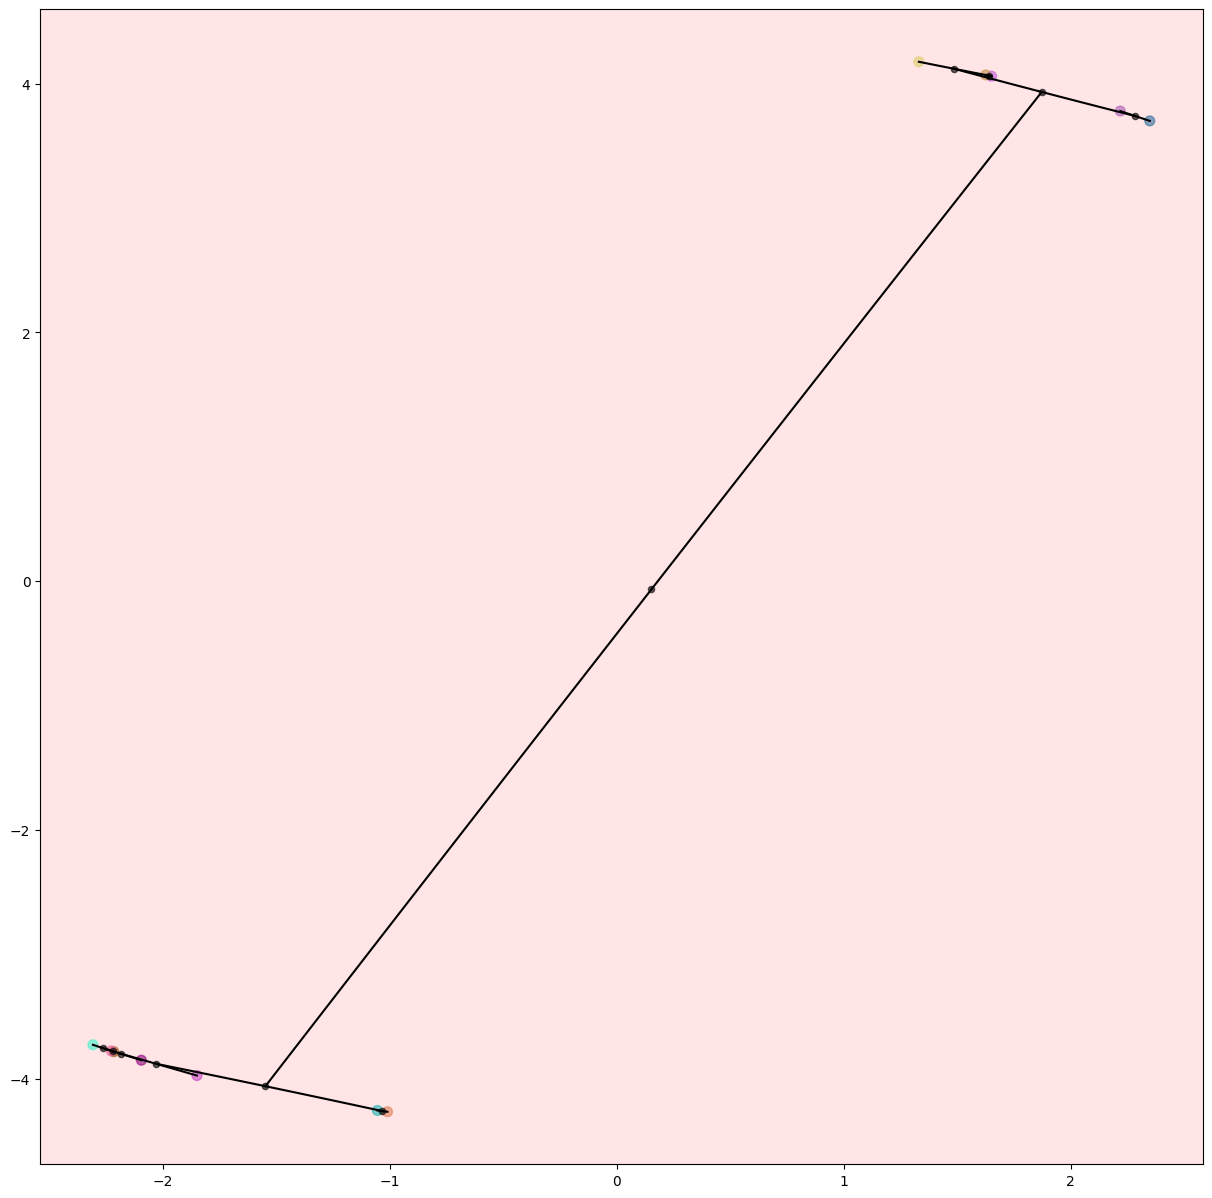

In [73]:
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)

# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

# where_are_NaNs = np.isnan(embeddings)
# embeddings[where_are_NaNs] = 0
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0]*20, embeddings[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(embeddings[n:,0]*20,embeddings[n:,1]*20,color = 'black',s=20,alpha=0.6)


for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2];
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph.png");

np.save(save_path+'data_hyper_xy.npy',embeddings)
# embeddings = np.array(uf.pos)


nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=embeddings[i];
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

values = [];
fathers = [];

search_merge_tree(root,-1,0,values,fathers)
np.save(save_path+"dataxy.npy",values)
np.save(save_path+"datalink.npy",fathers)
# return loss2



In [48]:
dumpys = embeddings[n:]

result = []

for t in (dumpy_node):
    left = t.son[0].subson
    right = t.son[1].subson;
    out_inner=[];
    for i in left:
        inner_list=[];
        for j in right:
            inner_list.append([i,j])
        out_inner.append(inner_list)
    result.append(out_inner)


dataset_test = IMDataset(similarities,2500,leaves_embeddings,result)
dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=True, num_workers=8, pin_memory=True)
model2 = improvehc(leaves_embeddings,dumpys,dataset_test.n_nodes)
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model2.parameters(),0.005)

for epoch in range(20):
    model2.train()
    total_loss = 0.0
    # print(model2.embeddings.weight.data)
    for step, datas in enumerate(dataloader):
        lca = datas[0]
        l_and_r = datas[1].tolist()
        sims = datas[2]
        loss = model2.loss(lca,l_and_r,sims)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))

tensor([[-0.1110, -0.1889],
        [ 0.0819,  0.2032],
        [-0.0516, -0.2130],
        [-0.1132, -0.1876],
        [-0.1092, -0.1899],
        [ 0.1142,  0.1870],
        [-0.1014, -0.1939],
        [ 0.0743,  0.2060],
        [ 0.0936,  0.1966],
        [-0.0773, -0.2029],
        [ 0.0077, -0.0033]], dtype=torch.float64)


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/package/datasets/improve_dataset.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(temp)


	 Epoch 0 | average train loss: 1.253996
tensor([[-0.1110, -0.1889],
        [ 0.0819,  0.2032],
        [-0.0516, -0.2130],
        [ 0.1942, -0.1342],
        [-0.2134,  0.1076],
        [ 0.1142,  0.1870],
        [ 0.1958, -0.1336],
        [ 0.2240, -0.0717],
        [ 0.2393, -0.0609],
        [ 0.2078, -0.1228],
        [-0.0426,  0.0134]], dtype=torch.float64)
	 Epoch 1 | average train loss: 1.253986
tensor([[-0.1110, -0.1889],
        [ 0.0819,  0.2032],
        [-0.0516, -0.2130],
        [ 0.1942, -0.1342],
        [-0.2134,  0.1076],
        [ 0.1142,  0.1870],
        [ 0.1958, -0.1336],
        [ 0.2240, -0.0717],
        [ 0.2385, -0.0640],
        [ 0.2095, -0.1216],
        [-0.0656,  0.0241]], dtype=torch.float64)
	 Epoch 2 | average train loss: 1.253986
tensor([[-0.1110, -0.1889],
        [ 0.0819,  0.2032],
        [-0.0516, -0.2130],
        [ 0.1942, -0.1342],
        [-0.2134,  0.1076],
        [ 0.1142,  0.1870],
        [ 0.1958, -0.1336],
        [ 0.2240, -0.

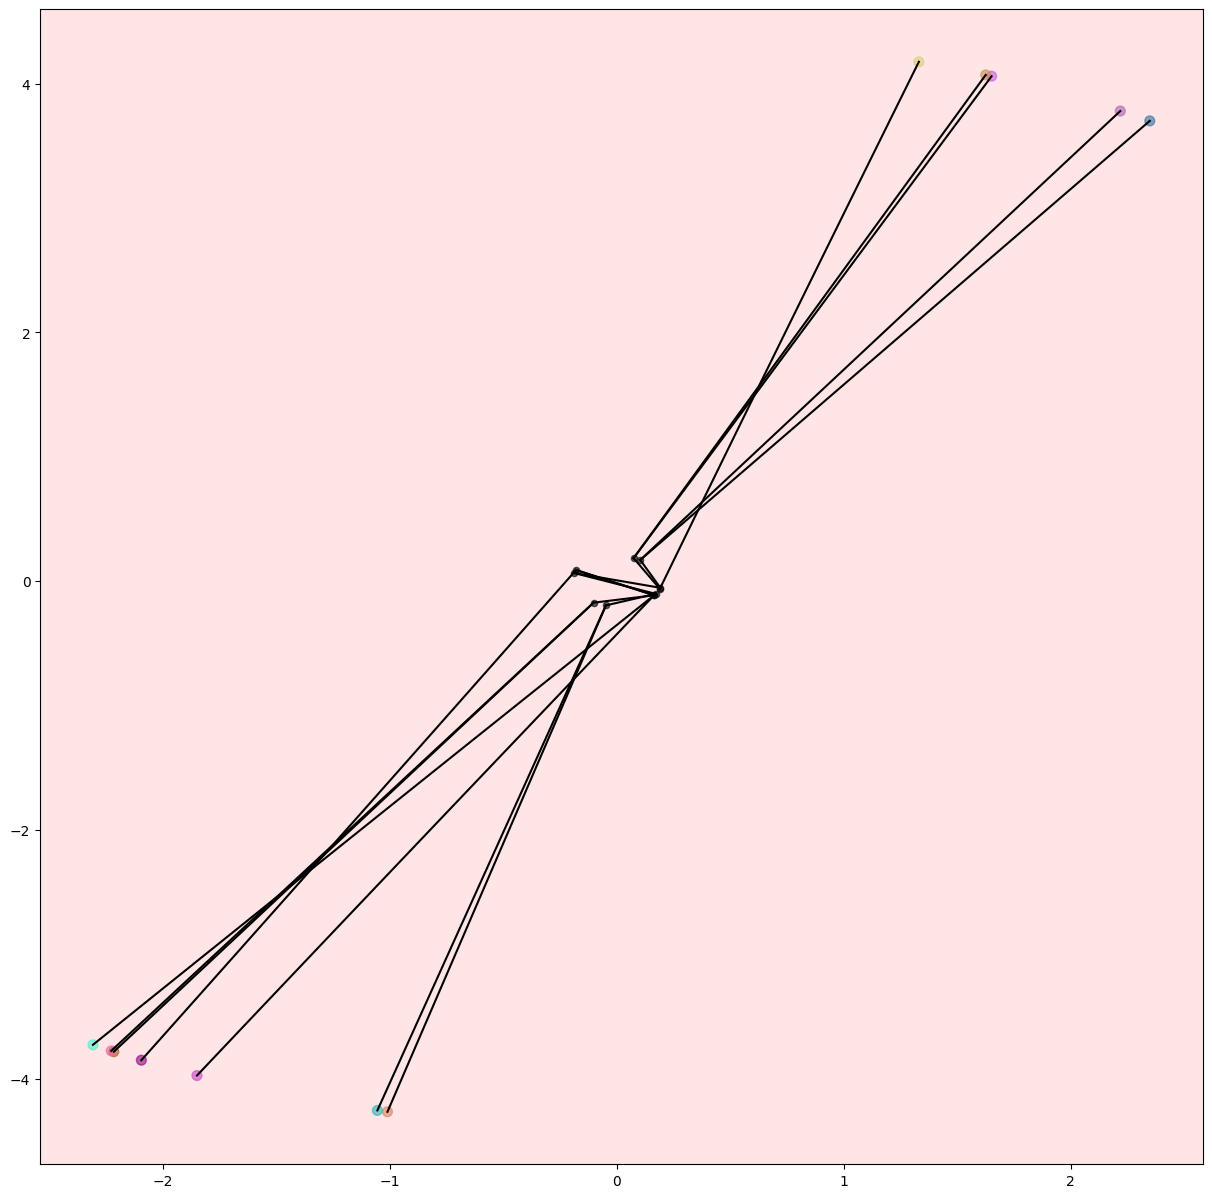

In [74]:
temp = model2.normalize_embeddings(model2.embeddings.weight.data)
for i in range(len(dumpy_node)):
    embeddings[i+len(leaves_embeddings)] = temp[i].detach().numpy() 
embeddings = project(torch.tensor(embeddings))
embeddings = np.array(embeddings)
colors = get_colors(y_true, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 20.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0]*20, embeddings[:n, 1]*20, c=colors, s=50, alpha=0.6)
ax.scatter(embeddings[n:,0]*20,embeddings[n:,1]*20,color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)
fig.savefig(save_path+"graph_after.png")
np.save(save_path+'data_hyper_xy_after.npy',embeddings)

In [ ]:
x, y_true, similarities = load_data('./datas/pre3/d1/datas.data',1,1616,0)
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=8, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)
params=torch.load('./datas/pre3/d1/model.pth')
model.load_state_dict(params, strict=False)
sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n,leaves_embeddings)
uf.merge(ijs)
count=0
tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)
n = len(leaves_embeddings)
# embeddings = np.array(uf.pos)
embeddings = complete_tree(tree, leaves_embeddings)

In [ ]:
nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=embeddings[i];
    nodes1[j].subson.extend(nodes1[i].subson)
ans_list = []
root = nodes1[-1];
dumpy_node = nodes1[n:]

In [ ]:
result = []

for t in (dumpy_node):
    left = t.son[0].subson
    right = t.son[1].subson;
    out_inner=[];
    for i in left:
        inner_list=[];
        for j in right:
            inner_list.append([i,j])
        out_inner.append(inner_list)
    result.append(out_inner)
result

In [ ]:

dataset_test = IMDataset(similarities,2560,leaves_embeddings,result)
dataset_test

In [ ]:
len(dataset_test)

In [ ]:
dumpys = [i.value for i in dumpy_node]
dumpys

In [ ]:
from model.improvehc import improvehc

dataloader = data.DataLoader(dataset_test, batch_size=1, shuffle=True, num_workers=8, pin_memory=True)
model = improvehc(leaves_embeddings,dumpys,dataset_test.n_nodes)

In [ ]:
for step,i in enumerate(dataset_test):
    print(step,i)
    break

In [ ]:
dataset_test[1]

In [ ]:
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.05)

# train(model,dataloader,optimizer,similarities,epoches);

In [ ]:
for epoch in range(20):
    model.train()
    total_loss = 0.0
    print(model.embeddings.weight.data)
    for step, data in enumerate(dataloader):
        lca = data[0]
        l_and_r = data[1].tolist()
        sims = data[2]
        loss = model.loss(lca,l_and_r,sims)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss
    total_loss = total_loss.item() / (step + 1.0)
    print("\t Epoch {} | average train loss: {:.6f}".format(epoch, total_loss))

    # keep best embeddings
    # if (epoch + 1) % 1 == 0:
#         tree = model.decode_tree(fast_decoding=1)
#         cost = dasgupta_cost(tree, similarities)
#         logging.info("{}:\t{:.4f}".format("Dasgupta's cost", cost))
#         if cost < best_cost:
#             counter = 0
#             best_cost = cost
#             best_model = model.state_dict()
#         else:
#             counter += 1
#             if counter == 20:
# #                 logging.info("Early stopping.")
#                 return


In [92]:
d1=torch.tensor(embeddings[0])
d2=torch.tensor(embeddings[1])

In [94]:
hyp_dist_o(d1)+hyp_dist_o(d2)

tensor([0.8909], dtype=torch.float64)

In [95]:
hyp_dist(d1,d2)

tensor([1.5377], dtype=torch.float64)

In [ ]:
hyp_dist(torch.tensor(nodes1[0].value),torch.tensor(nodes1[1].value))
